In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D , MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.metrics import confusion_matrix



from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
batch_size = 64
IMG_SIZE = (224, 224) #specific for VGG16
IMG_SHAPE = IMG_SIZE + (3,)
data_folder = 'MUSEUM_IMAGES'

data_dir_test_balanced = os.path.join(data_folder, 'TEST_BALANCED')
test_data_balanced = tf.keras.utils.image_dataset_from_directory(
  data_dir_test_balanced,
  image_size= IMG_SIZE,
  seed=1,
  batch_size= batch_size)

data_dir_test_unbalanced = os.path.join(data_folder, 'TEST_UNBALANCED')
test_data_unbalanced = tf.keras.utils.image_dataset_from_directory(
  data_dir_test_unbalanced,
  image_size= IMG_SIZE,
  seed=1,
  batch_size= batch_size)


Found 1789 files belonging to 9 classes.
Found 200 files belonging to 9 classes.


In [3]:
name_model = 'vgg16_culture_customized.h5'
model = tf.keras.models.load_model(name_model)

In [9]:
def get_predictions_and_true_labels(test_data, model):
    """
    @inputs : test_data : the set you want the prediction
    WARNING : in this fuction, test_data must have the same form as the output of 
                tf.keras.utils.image_dataset_from_directory
              model : architecture used for the prediction
                
    @outpus : predictions and true labels 
    """
    predictions = np.array([])
    true_labels =  np.array([])
    for x, y in test_data: 
        predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=1)])
        true_labels = np.concatenate([true_labels, y.numpy()])
    return predictions, true_labels



def show_confusion_matrix(predictions, true_labels, map_period, title=''):
    conf_mat = confusion_matrix(true_labels, predictions)
    
    plt.figure(figsize=(8,8))
    sns.heatmap(conf_mat, cmap="Blues",
    annot=True, xticklabels=map_period.keys(),
    yticklabels=map_period.keys(),
    fmt="d")

    plt.xlabel("Predicted class")
    plt.ylabel("True class")
    plt.title(title)
    plt.show()

In [5]:
predictions_balanced, true_labels_balanced = get_predictions_and_true_labels(test_data_balanced, model)
predictions_unbalanced, true_labels_unbalanced = get_predictions_and_true_labels(test_data_unbalanced, model)



In [15]:
class_names = test_data_balanced.class_names
map_period = {k : i for i,k in enumerate(class_names)}

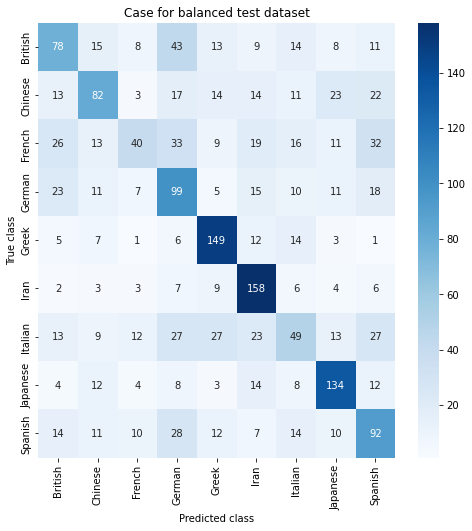

In [16]:
show_confusion_matrix(predictions_balanced, true_labels_balanced, map_period, title='Case for balanced test dataset')

In [20]:
accuracy_score( true_labels_balanced, predictions_balanced)

0.4924538848518726

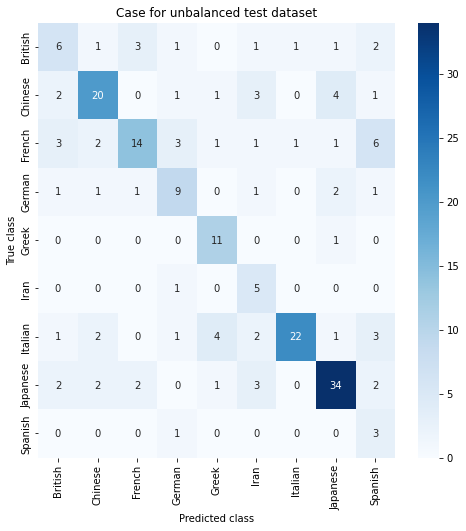

In [17]:
show_confusion_matrix(predictions_unbalanced, true_labels_unbalanced, map_period, title='Case for unbalanced test dataset')

In [21]:
accuracy_score( true_labels_unbalanced, predictions_unbalanced)

0.62

In [18]:

def predict_single_image(image_path,model, class_names, image_size):
    
    
    """
  @inputs : image_path : the path to the image we want to predict the class
            model : architecture used for the prediction
            class_names : the name of the 4 classes
  
  @output : show the image and give the class predicted by the model

    """

  #import the image and resize it for the model
    image_to_predict = cv2.imread(image_path,cv2.IMREAD_COLOR)
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict, image_size), axis=0) 

    #prediction of the class by the model
    res = np.argmax(model.predict(img_to_predict), axis=1)
    prediction = class_names[res[0]] #to have the name of the class instead of a number

    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.title(f'prediction : {prediction}')
    plt.show()
